In [1]:
import sys; print(sys.version)
import pandas as pd; print (pd.__version__ )
import seaborn as sns; print (sns.__version__)
import matplotlib.pyplot as plt; 
import numpy as np

3.7.4 (default, Aug  9 2019, 18:34:13) [MSC v.1915 64 bit (AMD64)]
0.25.1
0.9.0


## K-Means

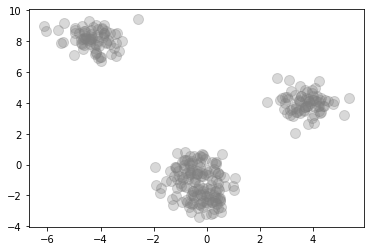

In [2]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn.metrics import pairwise_distances_argmin

data, classes = make_blobs(n_samples=300, centers=4, cluster_std=0.6)
plt.scatter(data[:, 0], data[:, 1], c='gray', s=50 * 2, alpha=0.3);

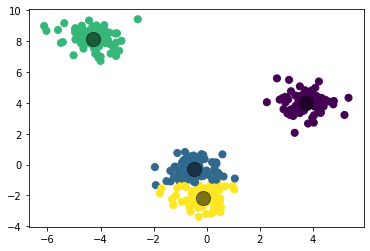

In [3]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(data)
data_kmeans = kmeans.predict(data)
plt.scatter(data[:, 0], data[:, 1], c=data_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

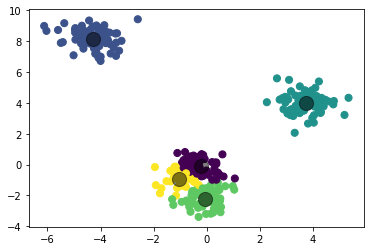

In [4]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5)
kmeans.fit(data)
data_kmeans = kmeans.predict(data)
plt.scatter(data[:, 0], data[:, 1], c=data_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

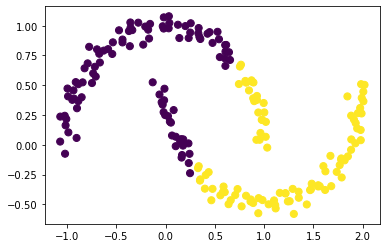

In [5]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_moons
data, classes = make_moons(200, noise=.05, random_state=0)
data_kmeans = KMeans(2, random_state=0).fit_predict(data)
plt.scatter(data[:, 0], data[:, 1], c=data_kmeans, s=50);

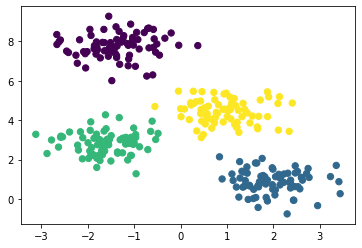

In [6]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn.metrics import pairwise_distances_argmin
from sklearn.cluster import KMeans

data, classes = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)

from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=4).fit(data)
labels = gmm.predict(data)
plt.scatter(data[:, 0], data[:, 1], c=labels, s=40, cmap='viridis');

In [7]:
probs = gmm.predict_proba(data)
print (len(probs))
print (probs[0:5])

300
[[8.04672295e-21 9.71688955e-01 2.38140471e-03 2.59296402e-02]
 [9.99999993e-01 7.13116691e-33 2.34837535e-15 7.15846263e-09]
 [2.04767765e-08 8.78022033e-12 9.13480329e-09 9.99999970e-01]
 [9.99999998e-01 7.76731322e-35 3.38693314e-18 1.51487210e-09]
 [1.38368754e-24 9.99174464e-01 5.27089805e-06 8.20264795e-04]]


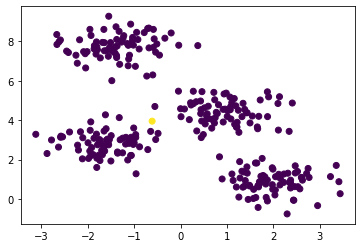

In [8]:
labels[probs.max(1) <= 0.9] = 1
labels[probs.max(1) > 0.9] = 0
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis');

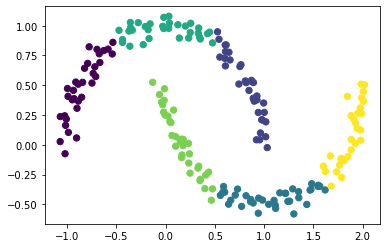

In [9]:
from sklearn.datasets import make_moons
data, classes = make_moons(200, noise=.05, random_state=0)
gmm = GaussianMixture(n_components=6).fit(data)
labels = gmm.predict(data)
plt.scatter(data[:, 0], data[:, 1], c=labels, s=40, cmap='viridis');

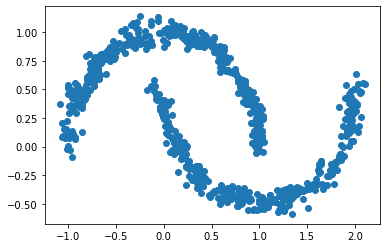

In [10]:
gmm = GaussianMixture(n_components=20).fit(data)
data_generated = gmm.sample(800)[0]
plt.scatter(data_generated[:, 0], data_generated[:, 1]);

##  Regression

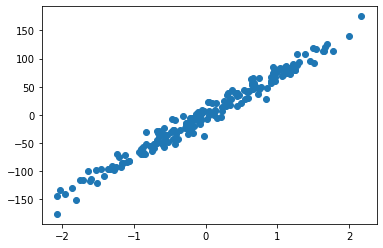

In [11]:
from sklearn import linear_model, datasets
x, y, coef = datasets.make_regression(n_samples=200, n_features=1, n_targets = 1,
                                      n_informative=1, noise=10, coef=True)
plt.plot(x, y, 'o')

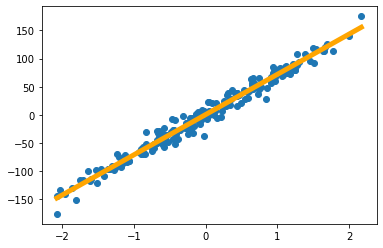

In [12]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x.reshape(200, 1), y)

xfit = np.linspace(min(x), max(x), 1000)
yfit = model.predict(xfit.reshape(1000, 1))

plt.scatter(x, y)
plt.plot(xfit, yfit, linewidth=5, color='orange');

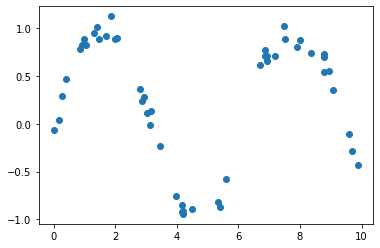

In [13]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)
plt.scatter(x, y);

(0.0, 10.0, -1.5, 1.5)

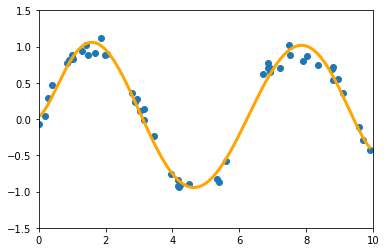

In [14]:
from sklearn.preprocessing import PolynomialFeatures

poly_model = PolynomialFeatures(7)
x_7n = poly_model.fit_transform(x.reshape(50, 1))
y_7n = poly_model.fit_transform(y.reshape(50, 1))

reg = LinearRegression()
reg.fit(x_7n, y_7n)

xfit = np.linspace(min(x), max(x), 1000)
xfit_n = poly_model.fit_transform(xfit.reshape(1000, 1))
yfit_n = reg.predict(xfit_n)

plt.scatter(x, y)
plt.plot(xfit_n[:, 1], yfit_n[:, 1], linewidth=3, color='orange');
plt.axis([0, 10, -1.5, 1.5])

In [15]:
df = pd.read_csv('house_prices.csv')
x = np.array(df.T.loc[['size', 'rooms']]).T
y = np.array(df.T.loc['price']).T
df[:10]

size  rooms   price
0  1600      3  329900
1  2400      3  369000
2  1416      2  232000
3  3000      4  539900
4  1985      4  299900
5  1534      3  314900
6  1427      3  198999
7  1380      3  212000
8  1494      3  242500
9  1940      4  239999

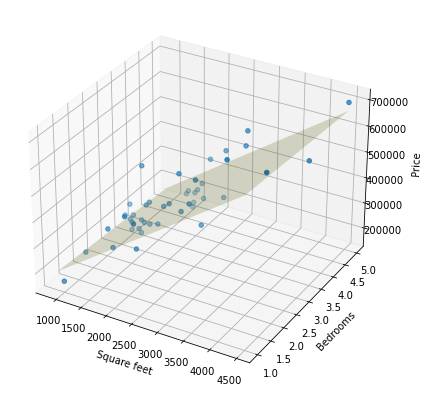

In [16]:
from mpl_toolkits.mplot3d import Axes3D

grid_range = np.vstack([x.min(axis=0), x.max(axis=0)])
grid = np.meshgrid(grid_range[:,0], grid_range[:,1])

model = LinearRegression()
model.fit(x, y)

X_grid = np.c_[grid[0].ravel(), grid[1].ravel()]
y_grid = model.predict(X_grid).reshape(grid[0].shape)

fig = plt.figure(figsize=[7, 7])
    
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel('Square feet')
ax.set_ylabel('Bedrooms')
ax.set_zlabel('Price', labelpad=10)

ax.scatter(x[:,0], x[:,1], y)
ax.plot_surface(grid[0], grid[1], y_grid, color='y', alpha=0.2);

## Logitic Regression

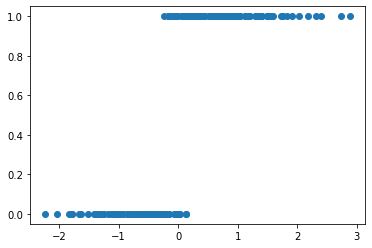

In [17]:
x, y, coef = datasets.make_regression(n_samples=200, n_features=1, n_targets = 1,
                                      n_informative=1, noise=15, coef=True)

y_hs = np.heaviside(y.reshape(1, 200)[0], 1)

plt.scatter (x, y_hs);

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


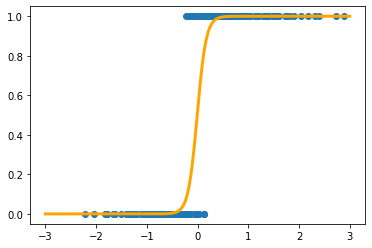

In [18]:
from sklearn.linear_model import LogisticRegression

lrf = LogisticRegression(C=1e5)
lrf.fit(x, y_hs);

def model(x):
    return 1 / (1 + np.exp(-x))

X_test = np.linspace(-3, 3, 300)
clf_func = model(X_test * lrf.coef_ + lrf.intercept_).ravel()
plt.plot(X_test, clf_func, color='orange', linewidth=3)
plt.scatter(x, y_hs);

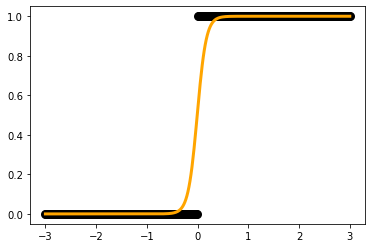

In [19]:
plt.plot(X_test, clf_func, color='orange', linewidth=3)
plt.scatter(X_test, lrf.predict(X_test.reshape(-1, 1)), color='black', linewidth=3);

## Hierarchical Clustering

In [20]:
df = pd.read_csv('iris_data_set.csv', na_values=['NA']).dropna()
x = np.array(df.drop(['class'], axis = 1))
df

sepal length  sepal width  petal length  petal width           class
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]

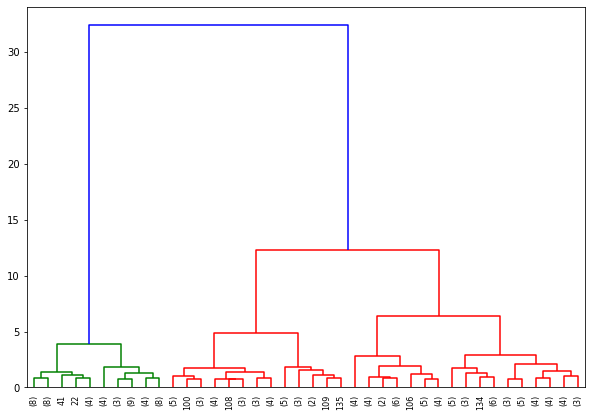

In [21]:
from scipy.cluster.hierarchy import dendrogram, linkage
lin = linkage(x, 'ward')
figure = plt.figure(figsize=(10, 7))
dendrogram(lin, truncate_mode='lastp',p=40,leaf_rotation=90)
plt.show()